In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Cleaning

In [2]:
data = pd.read_csv("/Users/ironhackberlin/Desktop/investments_VC.csv", encoding="latin-1")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

***Removing white spaces in Columns***

In [4]:
data.rename(columns={' market ':'market',' funding_total_usd ':'funding_total_usd'},inplace=True)

In [5]:
data.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***Checking Duplicates***

In [6]:
print('Duplicated entries:', data.duplicated().sum())
data[data.duplicated()].isna().mean()

Duplicated entries: 4855


permalink               1.0
name                    1.0
homepage_url            1.0
category_list           1.0
market                  1.0
funding_total_usd       1.0
status                  1.0
country_code            1.0
state_code              1.0
region                  1.0
city                    1.0
funding_rounds          1.0
founded_at              1.0
founded_month           1.0
founded_quarter         1.0
founded_year            1.0
first_funding_at        1.0
last_funding_at         1.0
seed                    1.0
venture                 1.0
equity_crowdfunding     1.0
undisclosed             1.0
convertible_note        1.0
debt_financing          1.0
angel                   1.0
grant                   1.0
private_equity          1.0
post_ipo_equity         1.0
post_ipo_debt           1.0
secondary_market        1.0
product_crowdfunding    1.0
round_A                 1.0
round_B                 1.0
round_C                 1.0
round_D                 1.0
round_E             

***Checking NaN***

In [7]:
data_na=data.isna().mean().to_frame()
data_na[data_na[0]>0].style.background_gradient(cmap='Blues')

,0
permalink,0.089439
name,0.089457
homepage_url,0.152963
category_list,0.162394
market,0.162523
funding_total_usd,0.089439
status,0.113641
country_code,0.186558
state_code,0.444487
region,0.186558


In [8]:
data.dropna(how='all', inplace=True)

# Quick Analysis

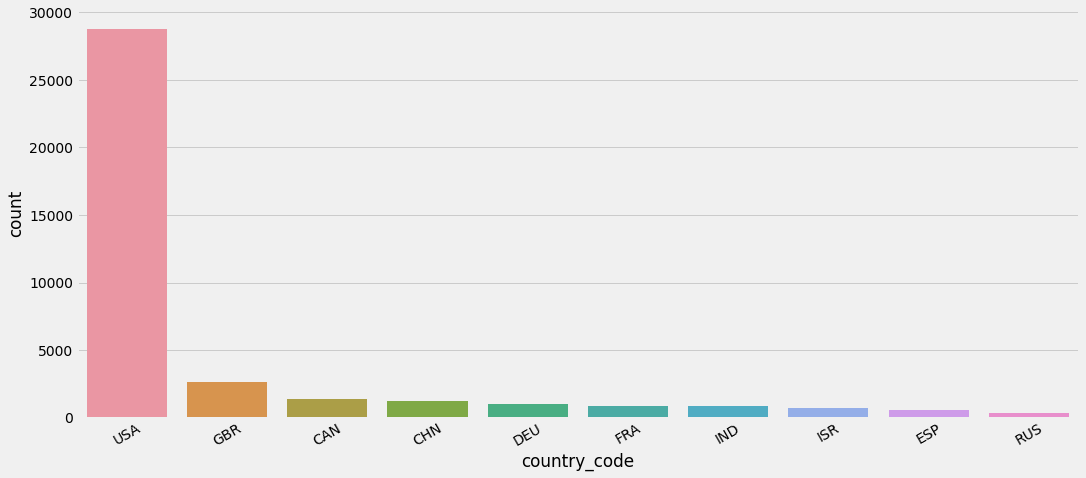

In [88]:
plt.figure(figsize=(16,7))
g = sns.countplot(x ='country_code', data = data, order=data['country_code'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()


From the graph we can notice that this dataset contains a huge majority of startups based in USA than other developed countries like Canada, approximately 10 times more and those countries are our top 3.

In [10]:
data.founded_year.describe()

count    38482.000000
mean      2007.359129
std          7.579203
min       1902.000000
25%       2006.000000
50%       2010.000000
75%       2012.000000
max       2014.000000
Name: founded_year, dtype: float64

In [11]:
founded_year=data[~data.founded_year.isna()]['founded_year'].astype('int')

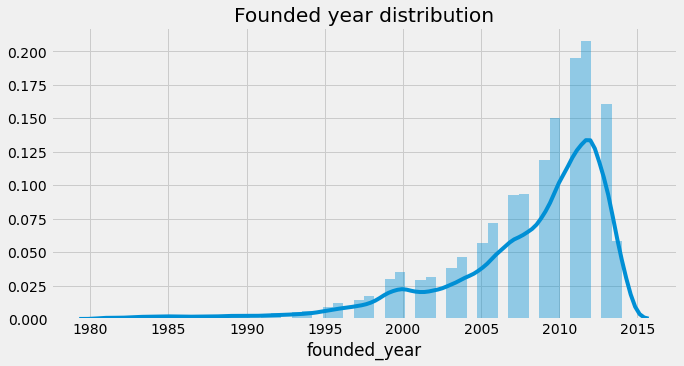

In [12]:
plt.figure(figsize=(10,5))
sns.distplot(founded_year[founded_year>1980])
plt.title('Founded year distribution')
plt.show()

there are companies from 1902 to 2014.

75% of the companies are very new and were established after 2006.

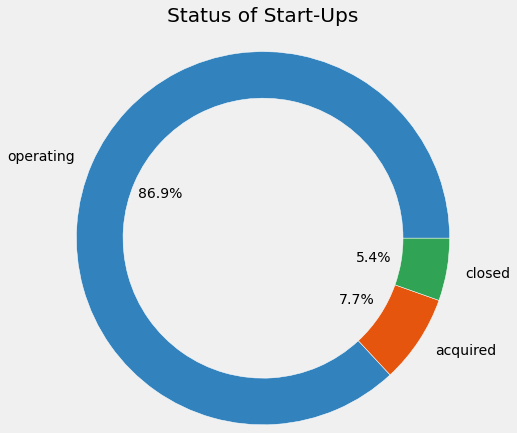

In [13]:
import numpy as np
status=data.status.value_counts()
plt.figure()

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
plt.pie(status.values, radius=2, colors=outer_colors,labels=status.index,autopct='%1.1f%%',
       wedgeprops=dict(width=0.5, edgecolor='w'))
plt.title('Status of Start-Ups',pad=100)
plt.show()

Most of company (86.9 %) in this dataset are still operating,
and around 5.4 % company is already closed while the other 7.7% got acquired.

# 3. Markets and Status

In [14]:
market=data.market.value_counts()
market[(market>1000)][0:10]
market=market[(market>1000)][0:10].to_frame()

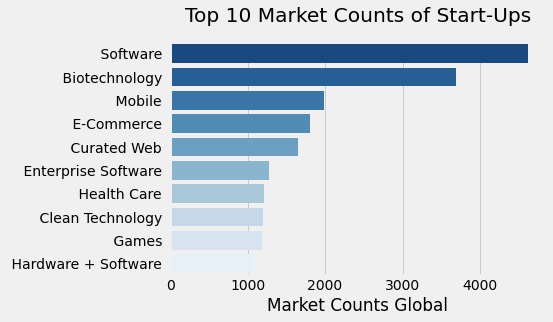

In [15]:
plt.figure()
ax1=sns.barplot(y=market.index,x=market.market,orient='h',palette='Blues_r')
ax1.set_title('Top 10 Market Counts of Start-Ups',pad=20)
ax1.set_xlabel('Market Counts Global')
plt.show()

In [16]:
market_con=data.groupby('country_code')['market'].value_counts().to_frame()

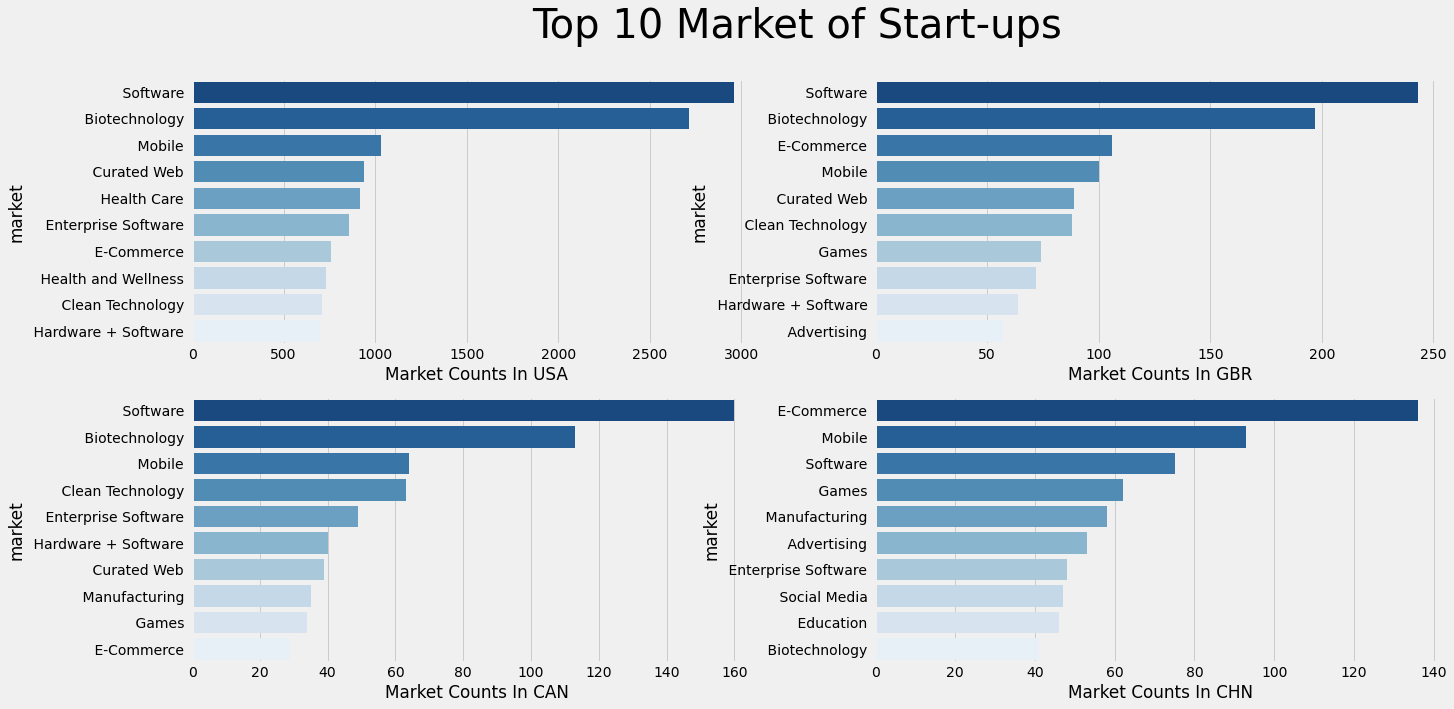

In [17]:
fig,axes=plt.subplots(2,2,figsize=(20,10))
cont=['USA','GBR','CAN','CHN']
for con,ax in zip(cont,range(1,5)):
    ax=plt.subplot(2,2,ax)
    ax=sns.barplot(y=market_con.loc[con].index[0:10],x=market_con.loc[con].market[0:10],orient='h',palette='Blues_r')
    ax.set_xlabel('Market Counts In {}'.format(con))
plt.suptitle('Top 10 Market of Start-ups',size=40)
plt.show()

From the above graphs we can clearly see that top 10 Market of Startups are Software, Biotechnology, Mobile, Curated Web, Health Care, Clean Technology, Games and finally Hardware + Software. 

Top 10 markets of all startups are software, biotech, Mobile. E-commerce etc

Top 10 markets of USA, CAN, GBR are basically the same.

The first one is E-commerce,and no clean tech on that list in CHINA.

In [18]:
top_markets=(data.market.value_counts()[data.market.value_counts()>24]).index
# We chose top markets to analyze,which are greater than 24 startups in that market.
sub_data=data[data.market.isin(top_markets)]

status_market_1=sub_data.groupby('market')['status'].value_counts(normalize=True).to_frame()
status_market_1.columns=['prop']
status_market_2=sub_data.groupby('market')['status'].value_counts().to_frame()
status_market_2.columns=['quantity']
status_market=pd.concat([status_market_1,status_market_2],axis=1)
status_market.reset_index()
status_market_closed=status_market.query('status=="closed"').reset_index(level=1)
status_market_closed.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Reds',subset=['prop']).set_caption('Markets that most start-ups closed')

,status,prop,quantity
market,,,
Public Relations,closed,0.204678,35
Coupons,closed,0.200000,7
VoIP,closed,0.172414,5
Facebook Applications,closed,0.169014,12
Location Based Services,closed,0.166667,10
Web Tools,closed,0.159091,7
iPhone,closed,0.156250,10
Curated Web,closed,0.155215,253
Social Network Media,closed,0.140351,24


Public Relations, coupons have the highest closed rate, while Consumer Electronics, Medical have the lowest closed rate.

In [19]:
status_market_closed.sort_values(by='prop',ascending=True)[0:10].style.background_gradient(cmap='Greens_r',subset=['prop']).set_caption('Markets that least start-ups closed')

,status,prop,quantity
market,,,
Medical,closed,0.007722,2
Technology,closed,0.007968,2
Consumer Electronics,closed,0.009259,1
Information Technology,closed,0.011236,1
Transportation,closed,0.012422,2
Services,closed,0.012658,1
Wireless,closed,0.013514,1
Telecommunications,closed,0.015152,1
Brand Marketing,closed,0.015152,1


In [20]:
status_market_acquired=status_market.query('status=="acquired"').reset_index(level=1)
status_market_acquired.sort_values(by='prop',ascending=False)[0:10].style.background_gradient(cmap='Blues',subset=['prop']).set_caption('Markets that has most start-ups acquired')


,status,prop,quantity
market,,,
Chat,acquired,0.241379,7
Cloud Management,acquired,0.240000,6
Storage,acquired,0.232143,13
VoIP,acquired,0.206897,6
Web Hosting,acquired,0.193622,85
Wireless,acquired,0.189189,14
Semiconductors,acquired,0.179074,89
Video Streaming,acquired,0.174603,11
Security,acquired,0.171875,88


# 4. Fundings

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3692.000000,2.013814,1.398832,1.000000,1.000000,2.000000,3.000000,15.000000
closed,2603.000000,1.434114,0.965478,1.000000,1.000000,1.000000,2.000000,11.000000
operating,41829.000000,1.689522,1.302072,1.000000,1.000000,1.000000,2.000000,18.000000


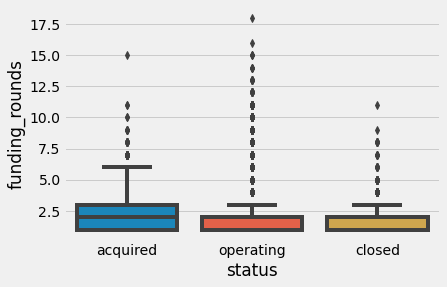

In [21]:
sns.boxplot(data=data,x='status',y='funding_rounds')
data.groupby('status')['funding_rounds'].describe().style.highlight_max(subset=['max','75%','50%','std','mean'],color='lightgreen')

In [22]:
data['funding_total_usd'].head()

0     17,50,000 
1     40,00,000 
2        40,000 
3     15,00,000 
4        60,000 
Name: funding_total_usd, dtype: object

In [23]:
Facebook_total_funding = data['funding_total_usd'][data['name']=="Facebook"].values[0]
Uber_total_funding = data['funding_total_usd'][data['name']=="Uber"].values[0]
Alibaba_total_funding = data['funding_total_usd'][data['name']=="Alibaba"].values[0]
Cloudera_total_funding = data['funding_total_usd'][data['name']=="Cloudera"].values[0]

In [24]:
Verizon_total_funding = data['funding_total_usd'][data['name']=="Verizon Communications"].values[0]
Sberbank_total_funding = data['funding_total_usd'][data['name']=="Sberbank"].values[0]

In [25]:
print("The average of seed funding stage is around ",data['seed'][data['seed'] != 0].mean(), "$")

The average of seed funding stage is around  776296.2534682081 $


In [26]:
data['get_funding_in_seed'] = data['seed'].map(lambda s :1  if s > 0 else 0)

In [27]:
data['get_funding_in_seed'] = data['seed'].map(lambda s :1  if s > 0 else 0)

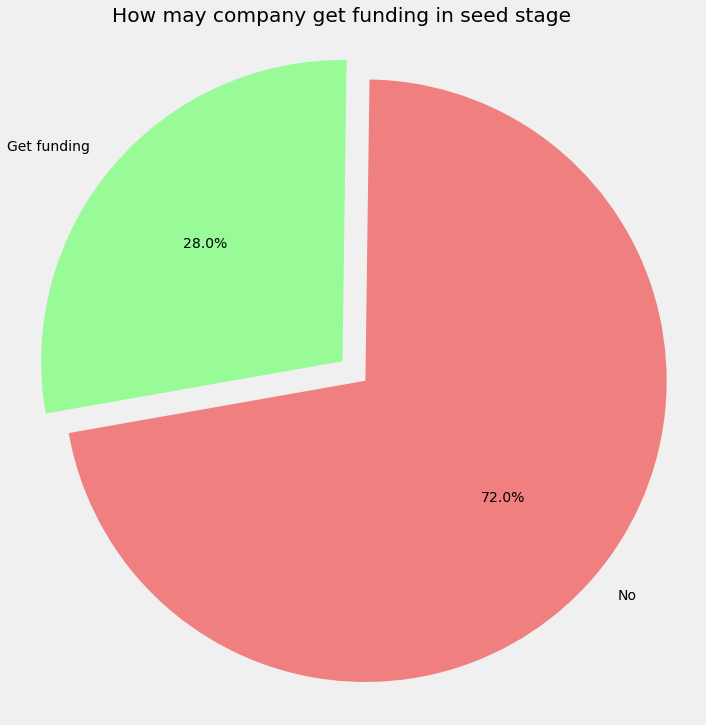

In [28]:
plt.rcParams['figure.figsize'] =10,10
labels = ['No','Get funding']
sizes = data['get_funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['lightcoral','palegreen'] 

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How may company get funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

In [29]:
data.funding_total_usd=data.funding_total_usd.str.replace(",",'').str.replace(' ',"")
data.funding_total_usd=data.funding_total_usd.replace("-",np.nan).astype('float',errors='ignore')
data.sort_values(ascending=False,by='funding_total_usd')[['name','funding_total_usd']][0:10]\
.style.hide_index().background_gradient(subset = 'funding_total_usd',cmap='Blues')

name,funding_total_usd
Verizon Communications,30079503000.000000
Sberbank,5800000000.000000
Clearwire,5700000000.000000
Charter Communications,5162513431.000000
First Data Corporation,3500000000.000000
COFCO,3200000000.000000
sigmacare,2600000000.000000
Facebook,2425700000.000000
Carestream,2400000000.000000
Flipkart,2351140000.000000


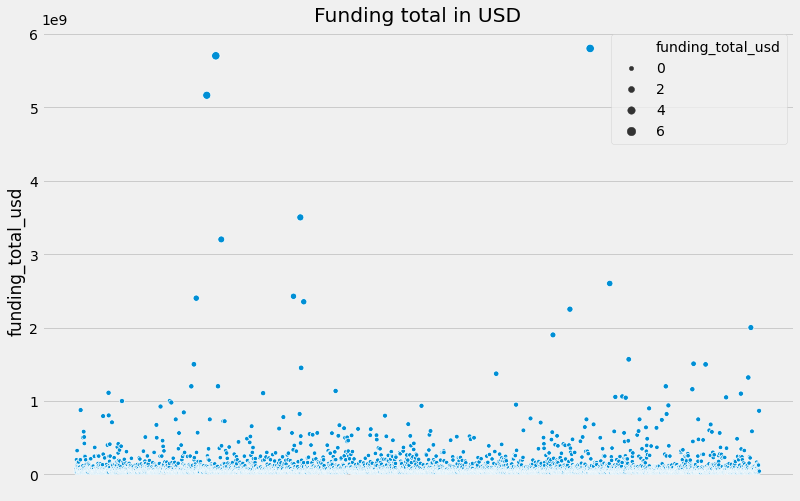

In [30]:
data1=data.sort_values(ascending=False,by='funding_total_usd')[['name','funding_total_usd']][1:5000].sort_index()
plt.figure(figsize=(12,8))
sns.scatterplot(data=data1,x='name',y='funding_total_usd',size='funding_total_usd')
plt.xticks([])
plt.title('Funding total in USD')
plt.xlabel("")
plt.show()

In [31]:
Q1 = data['seed'][data['seed'] != 0].quantile(0.25)
Q3 = data['seed'][data['seed'] != 0].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
without_outlier = data[(data['seed'] > lower_bound ) & (data['seed'] < upper_bound)]

In [32]:
Facebook_seed_funding = data['seed'][data['name']=="Facebook"].values[0]
Uber_seed_funding   = data['seed'][data['name']=="Uber"].values[0]
Dropbox_seed_funding   = data['seed'][data['name']=="Dropbox"].values[0]

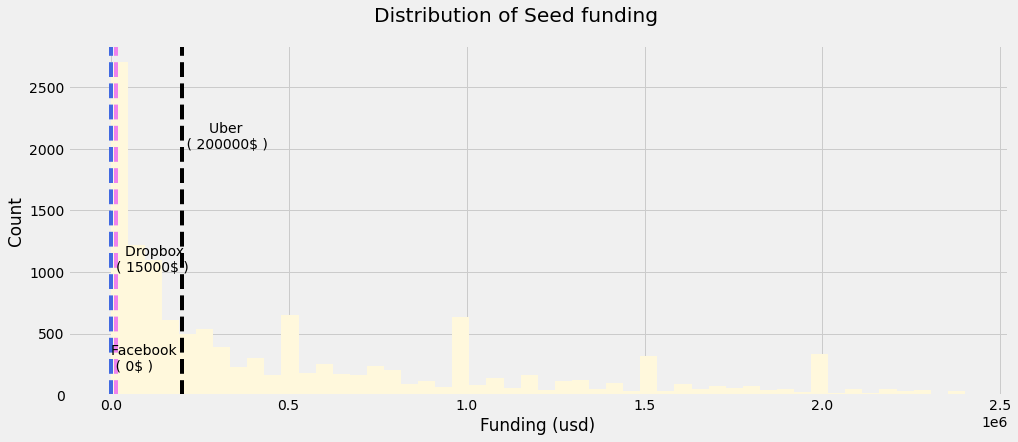

In [33]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['seed'][without_outlier['seed']!=0].dropna(), bins=50,color = 'cornsilk' )

plt.axvline(Facebook_seed_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_seed_funding+0.15, 200,"Facebook \n ( 0$ )")

plt.axvline(Uber_seed_funding,color='black',linestyle ="--")
plt.text(Uber_seed_funding+0.15, 2000,"      Uber \n ( 200000$ )")

plt.axvline(Dropbox_seed_funding,color='violet',linestyle ="--")
plt.text(Dropbox_seed_funding+0.15, 1000,"  Dropbox \n( 15000$ )")

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of Seed funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [34]:
print("The average of Angel funding is around ",data['angel'][data['angel'] != 0].mean(), "$")

The average of Angel funding is around  1033615.6954298498 $


In [35]:
data['get_funding_in_angel'] = data['angel'].map(lambda s :"Get funding"  if s > 0 else "Not get funding")

In [36]:
print("Only " , data['get_funding_in_angel'].value_counts().values[1], " companies has angel investor")
print("while " , data['get_funding_in_angel'].value_counts().values[0], " are not")
print("~",data['get_funding_in_angel'].value_counts().values[1]/(data['get_funding_in_angel'].value_counts().values[1]+data['get_funding_in_angel'].value_counts().values[0]) *100, "percent")

Only  3129  companies has angel investor
while  46309  are not
~ 6.329139528298071 percent


In [37]:
data['round_A'][data['round_A'] != 0].mean()


6830906.178162835

In [38]:
data['round_B'][data['round_B'] != 0].mean()

13549761.864145402

In [39]:
data['round_C'][data['round_C'] != 0].mean()

21004716.314416636

In [40]:
round_ = ['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']
amount = [data['round_A'][data['round_A'] != 0].mean(),
          data['round_B'][data['round_B'] != 0].mean(),
          data['round_C'][data['round_C'] != 0].mean(),
          data['round_D'][data['round_D'] != 0].mean(),
          data['round_E'][data['round_E'] != 0].mean(),
          data['round_F'][data['round_F'] != 0].mean(),
          data['round_G'][data['round_G'] != 0].mean(),
         data['round_H'][data['round_H'] != 0].mean()]
          

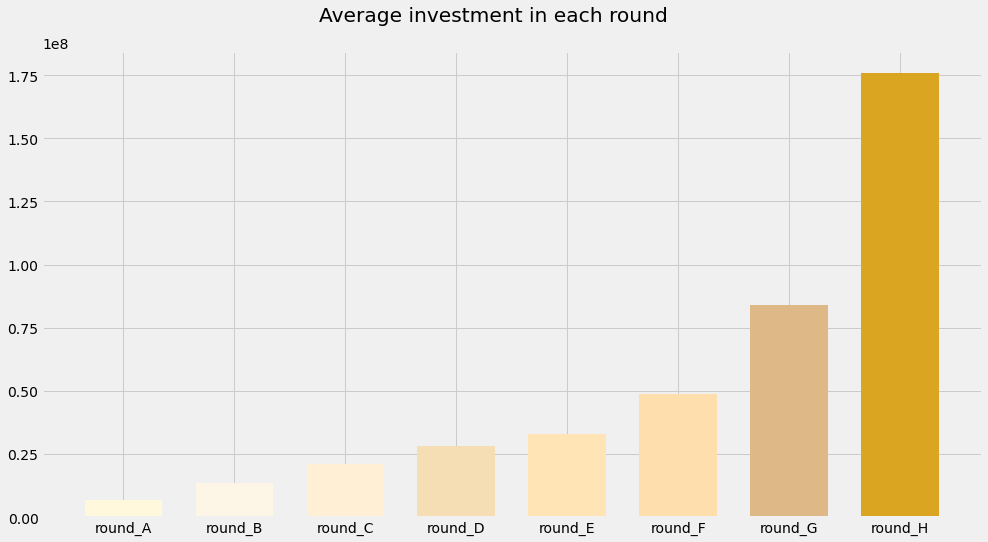

In [41]:
plt.rcParams['figure.figsize'] = 15,8

height = amount
bars =  round_
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7, color= ['cornsilk','oldlace','papayawhip','wheat','moccasin','navajowhite','burlywood','goldenrod'] )
plt.xticks(y_pos, bars)
plt.title("Average investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

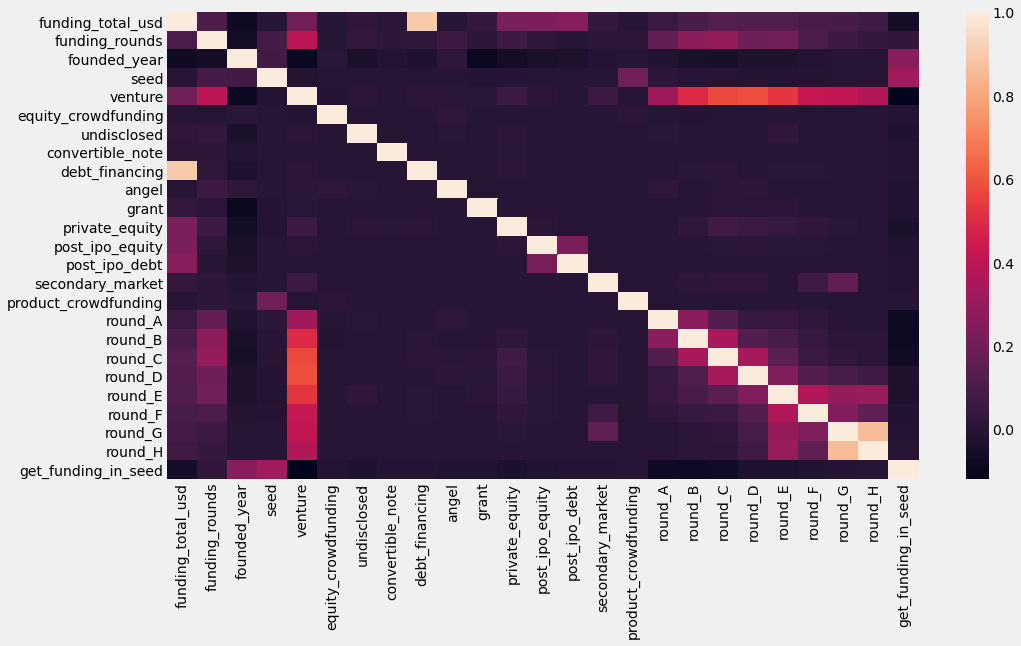

In [42]:
sns.heatmap(data.corr())
plt.show()